
##**STOCK PRICE PREDICTION USING LSTM**



---



## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import tensorflow.keras as tf
import os

## Importing information


In [32]:
data=yf.download('HDB',period='10y',interval='1d')

[*********************100%***********************]  1 of 1 completed


##Split for train and test

In [34]:
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data.iloc[:,4],test_size=0.3,random_state=42,shuffle=False)

##Scaling the data

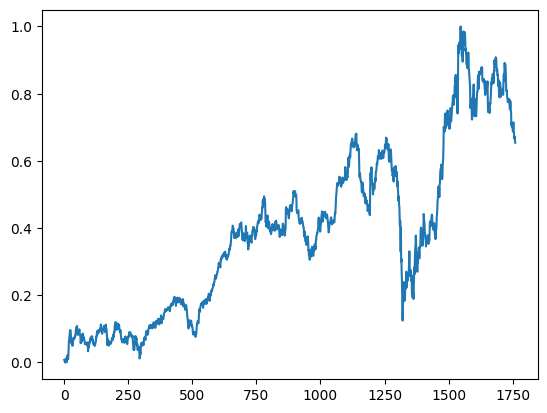

In [35]:
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.preprocessing import StandardScaler as ss
scaler=mms(feature_range=(0,1))
data_train_scaled=scaler.fit_transform(np.array(data_train).reshape(-1,1))
plt.plot(data_train_scaled)
plt.show()
data_test_scaled=scaler.fit_transform(np.array(data_test).reshape(-1,1))

## Creating a pattern array to feed into model:

---



In [36]:
def createPatternSet(data_train_scaled,steps):
  x_pattern=[]
  y_price=[]
  for day in range(steps,len(data_train_scaled)):
    row=data_train_scaled[day-steps:day,0]
    x_pattern.append(row)
    y_price.append(data_train_scaled[day])
  x_pattern,y_price=np.array(x_pattern),np.array(y_price)
  x_pattern=x_pattern.reshape(x_pattern.shape[0],x_pattern.shape[1],1)
  return x_pattern,y_price

In [37]:
x_train_final=createPatternSet(data_train_scaled,25)[0]
y_train_final=createPatternSet(data_train_scaled,25)[1]
x_test_final=createPatternSet(data_test_scaled,25)[0]
y_test_final=createPatternSet(data_test_scaled,25)[1]

### Building the Model


In [38]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [39]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train_final.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 25, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 25, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 25, 60)              │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 25, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 25, 80)              │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 25, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history=model.fit(x_train_final,y_train_final,epochs=50,batch_size=32)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - loss: 0.0780
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0096
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - loss: 0.0085
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0078
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0073
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0112
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 0.0068
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0060
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0081
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0068
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0064
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0054
Epoch 13/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 0.0050
Epoch 14/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 0.0050
Epoch 15/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 0.0056

##Plot the actual prices and predictions over training data

In [42]:
y_pred=model.predict(x_train_final)

55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step


In [43]:
y_pred=scaler.inverse_transform(y_pred)

In [44]:
y_train=scaler.inverse_transform(y_train_final)


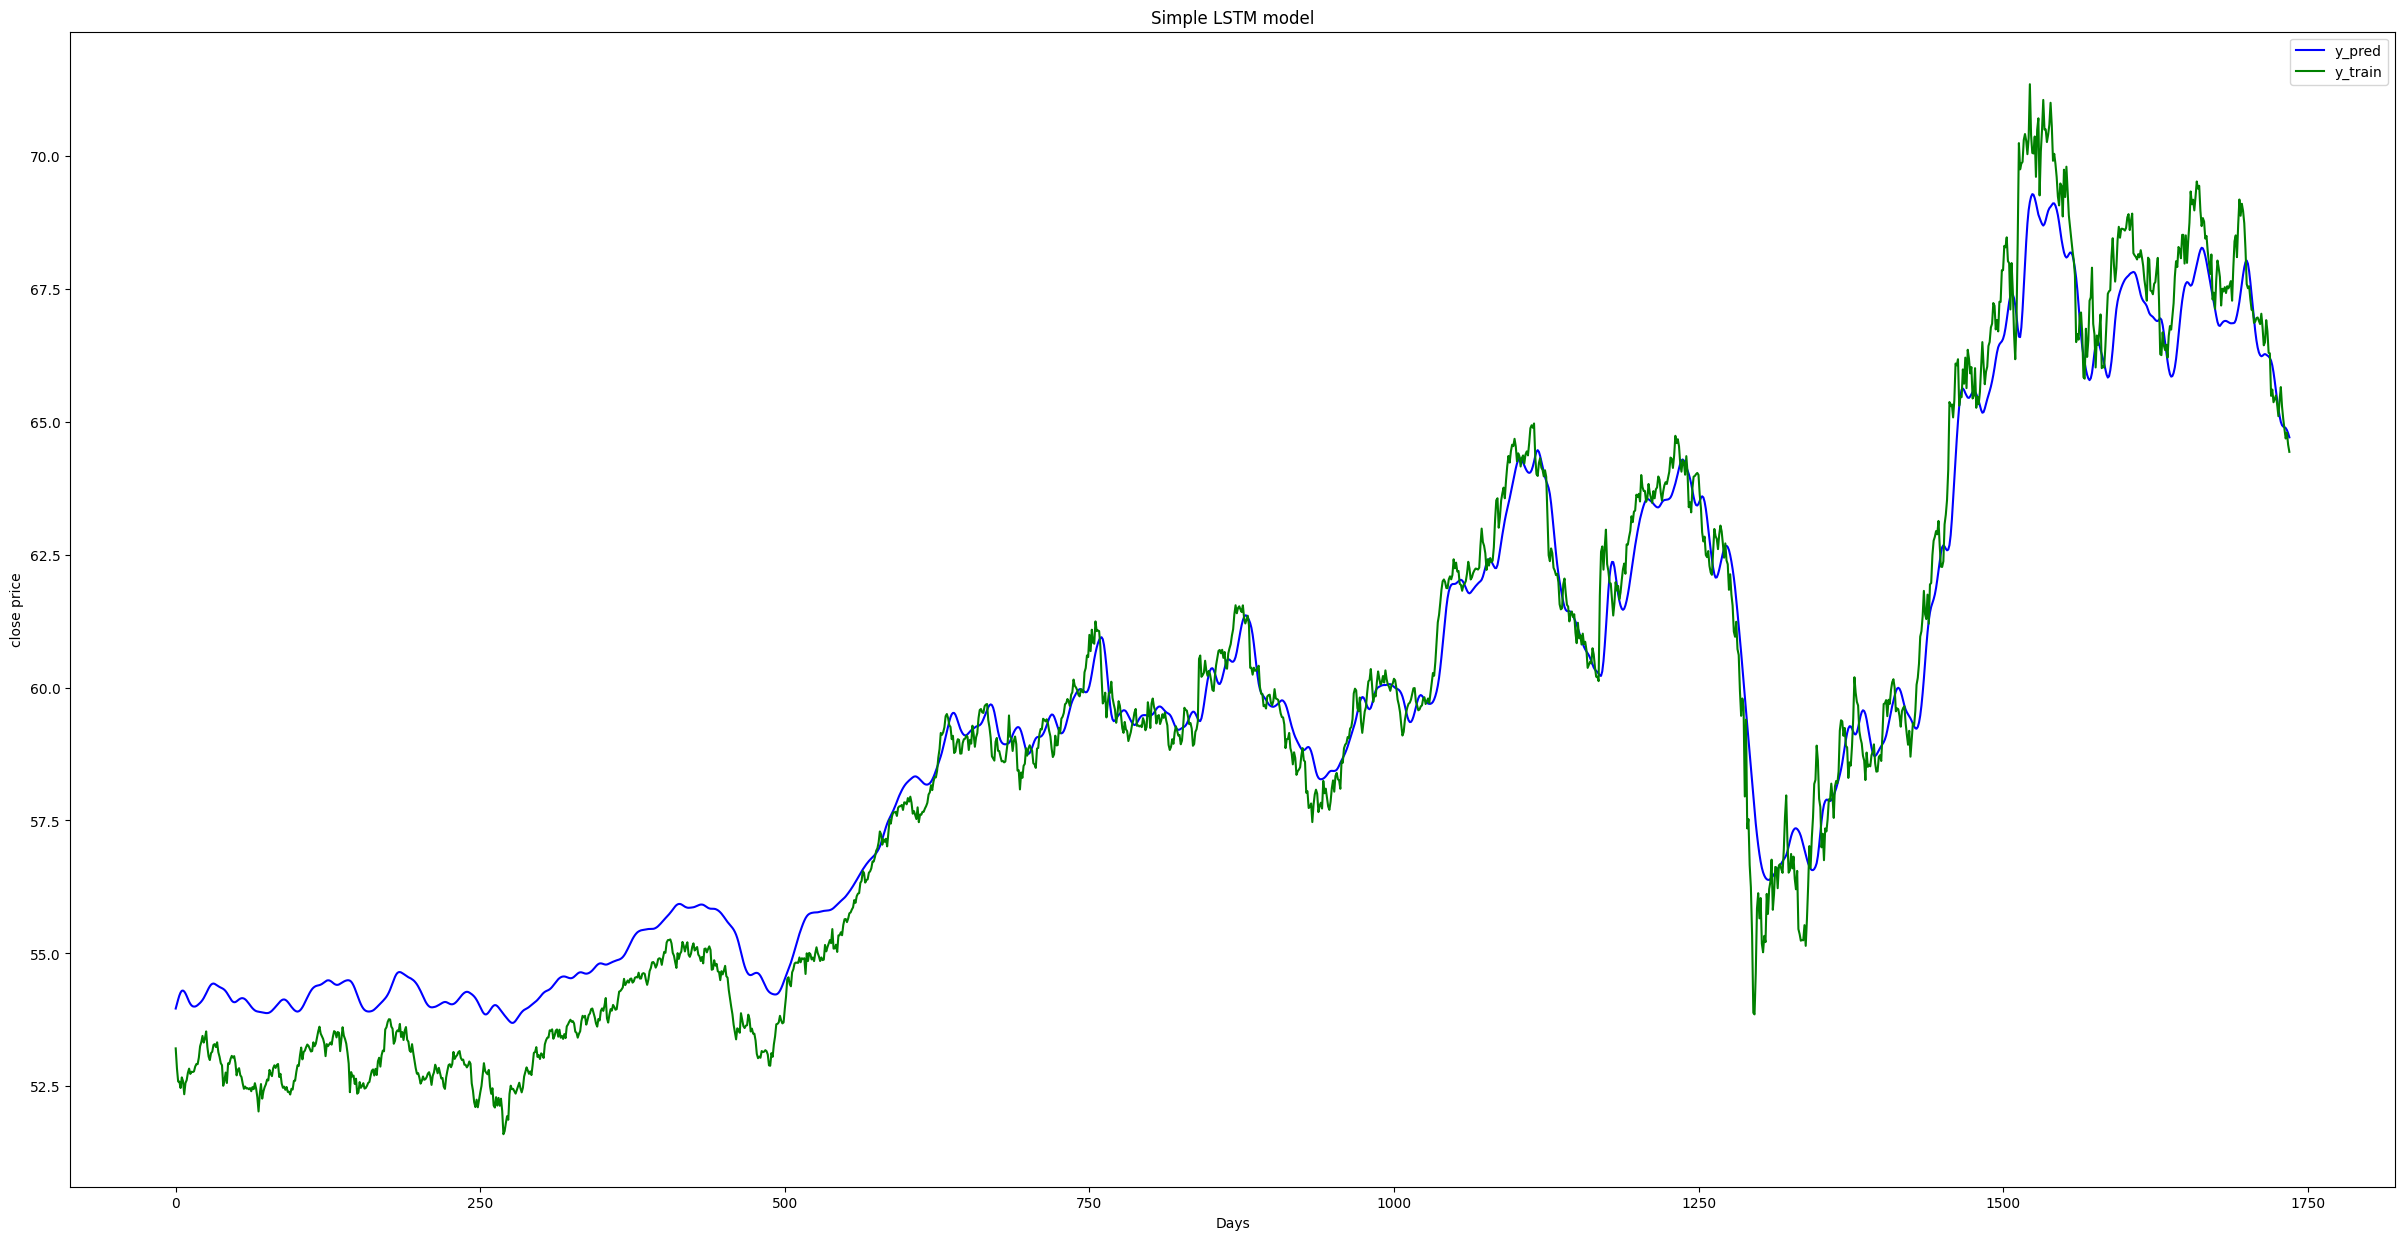

In [45]:
plt.figure(figsize = (30,15))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("close price")
plt.title("Simple LSTM model")
plt.legend()
plt.show()

#Making Predictions

In [46]:
y_pred_test=scaler.inverse_transform(model.predict(x_test_final))

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


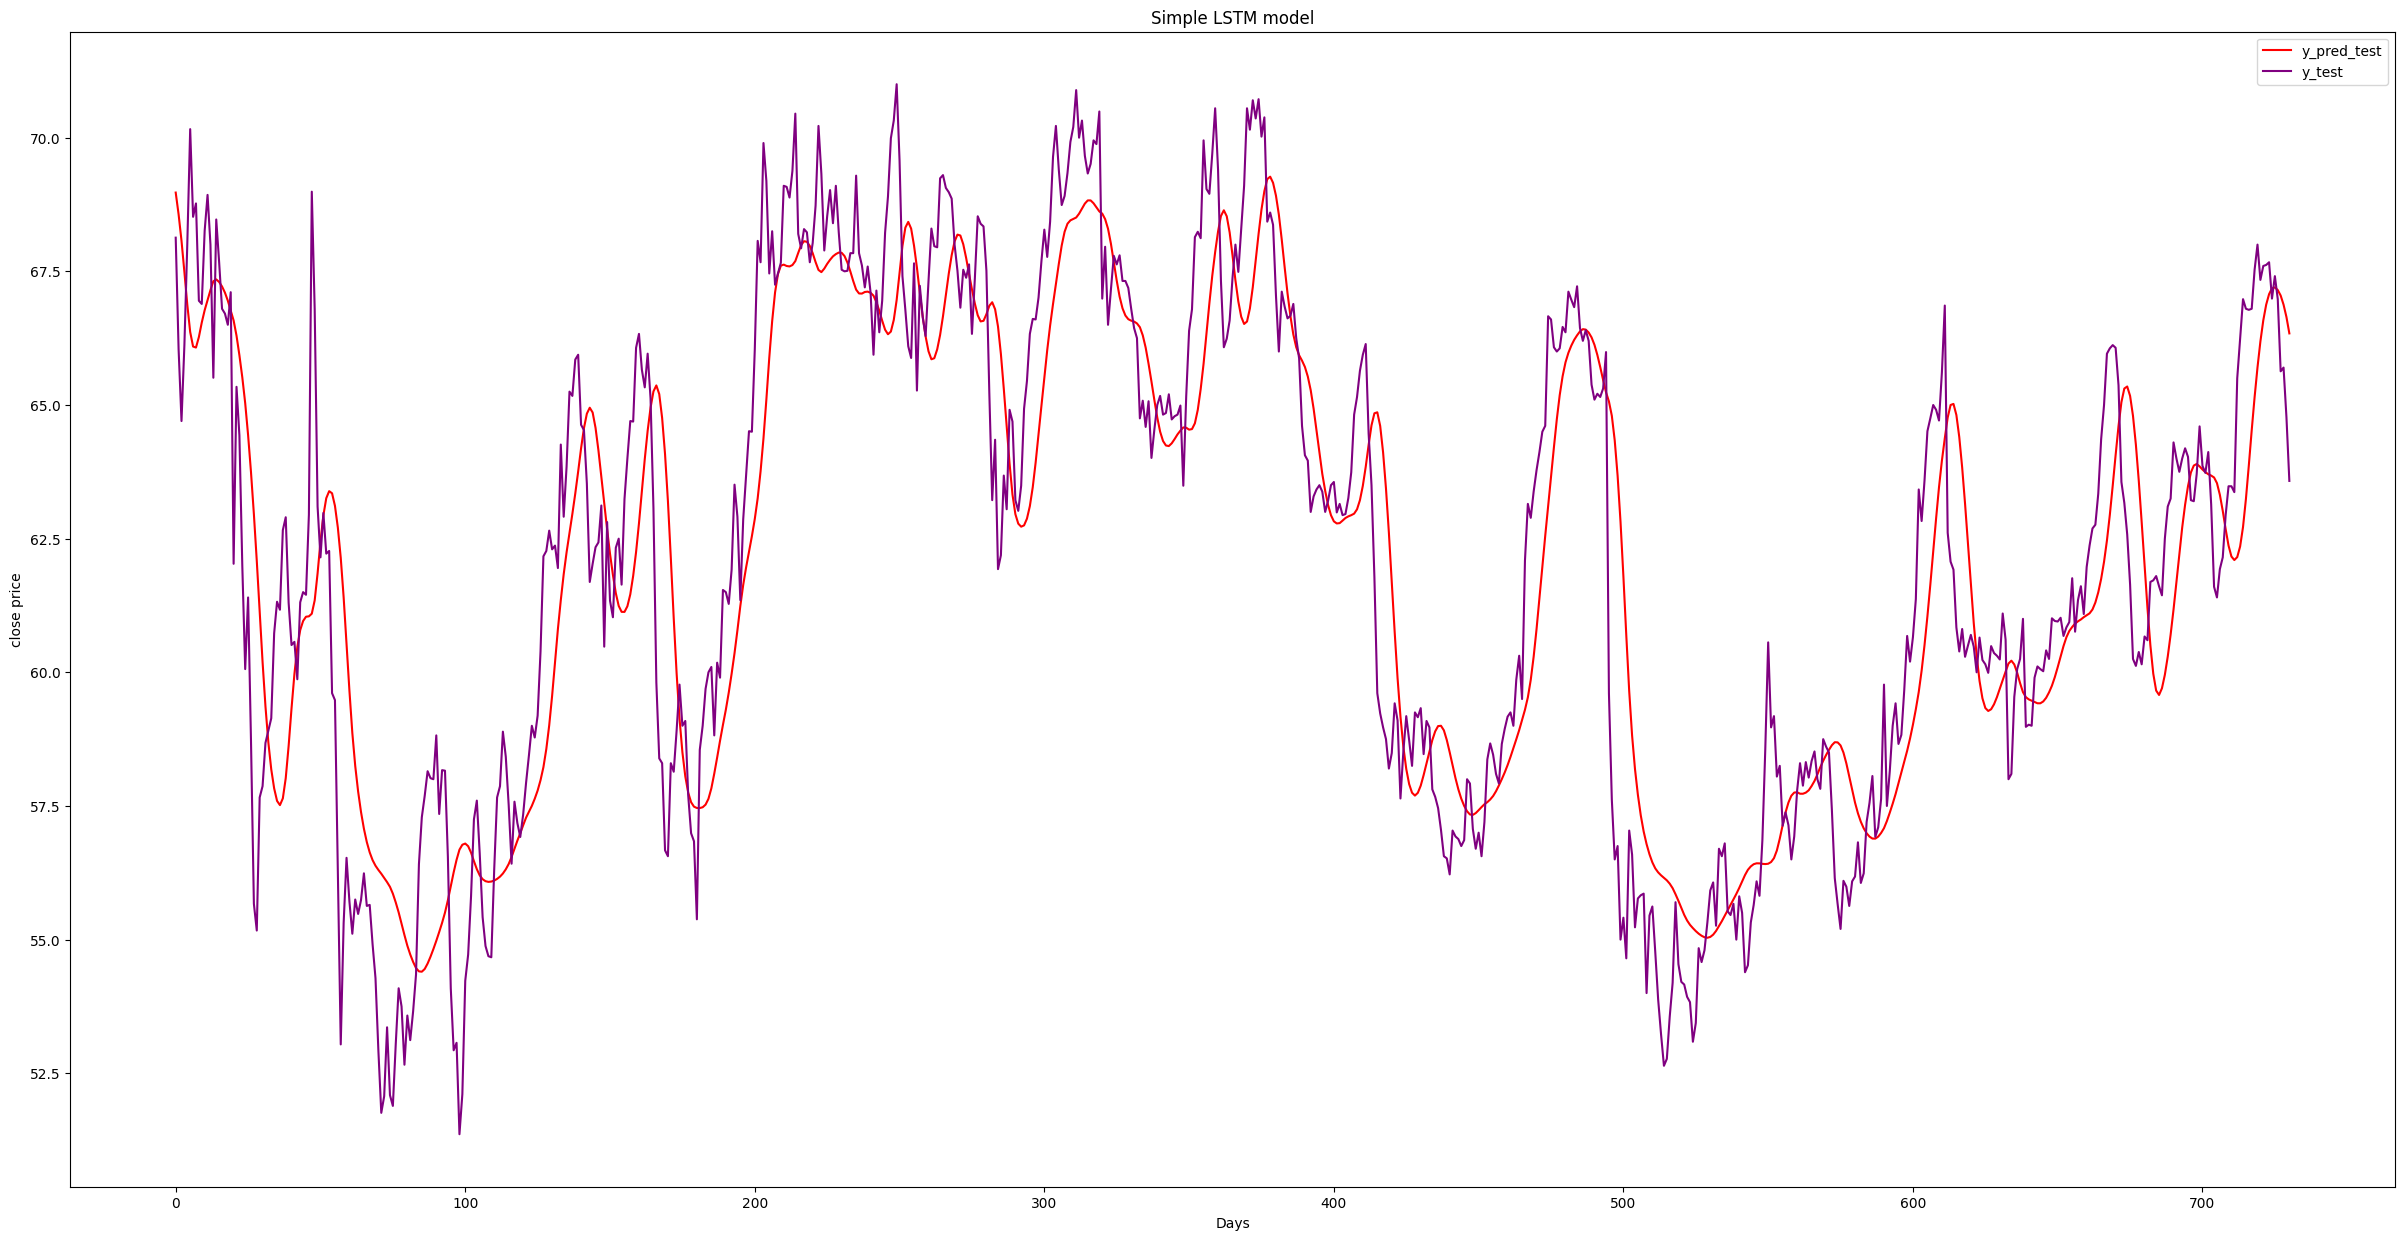

In [47]:
plt.figure(figsize = (30,15))
plt.plot(y_pred_test, color = "red", label = "y_pred_test" )
plt.plot(scaler.inverse_transform(y_test_final), color = "purple", label = "y_test")
plt.xlabel("Days")
plt.ylabel("close price")
plt.title("Simple LSTM model")
plt.legend()
plt.show()

In [48]:
model.save('price_predictor_model.keras')